In [61]:
from scipy.signal import fftconvolve
import numpy as np
import plotly.express as px
from PIL import Image, ImageChops
from scipy import ndimage

In [69]:
def get_fft( input_img ):
    ft = np.fft.ifftshift(np.array(input_img))
    ft = np.fft.fft2(ft)
    ft = np.fft.fftshift(ft)
    
    return ft


def limit_frequencies( fft, inner_limit=None, outer_limit=None ):
    center = (fft.shape[1] / 2, fft.shape[0] / 2)
    for y in range(fft.shape[0]):
        for x in range(fft.shape[1]):
            r = math.sqrt( abs(center[0] - x) ** 2 + abs(center[1] - y) ** 2 )
            
            if outer_limit is not None and r > outer_limit:
                fft[y,x] = 0
    
            if inner_limit is not None and r < inner_limit:
                fft[y,x] = 0

    return fft


def get_fft_spectrum( grating_img ):
    fft = get_fft( grating_img )
    
    fig = px.imshow(
        ndimage.uniform_filter(
            np.abs(fft),
            size=5
        ),
        color_continuous_scale=['white','black']
    )
    fig.update_layout(coloraxis_showscale=False)
    fig.update_xaxes(showticklabels=False)
    fig.update_yaxes(showticklabels=False)

    return fig

# Conv Image

In [59]:
x = np.arange(-100, 101, 1)
X, Y = np.meshgrid(x, x)
wavelength = 20
grating = np.sin(2 * np.pi * X / wavelength) * 0.5 + 0.5
grating[grating < 0] = 0
grating[grating > 1] = 1

angle = -10
grating_rotated = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
) * 0.5 + 0.77
grating_rotated[grating_rotated < 0] = 0
grating_rotated[grating_rotated > 1] = 1

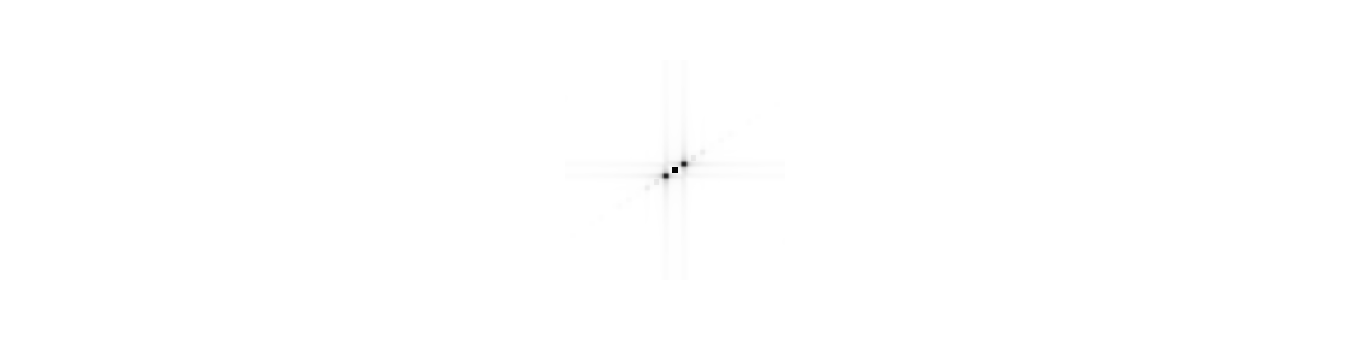

In [71]:
get_fft_spectrum(grating_rotated)

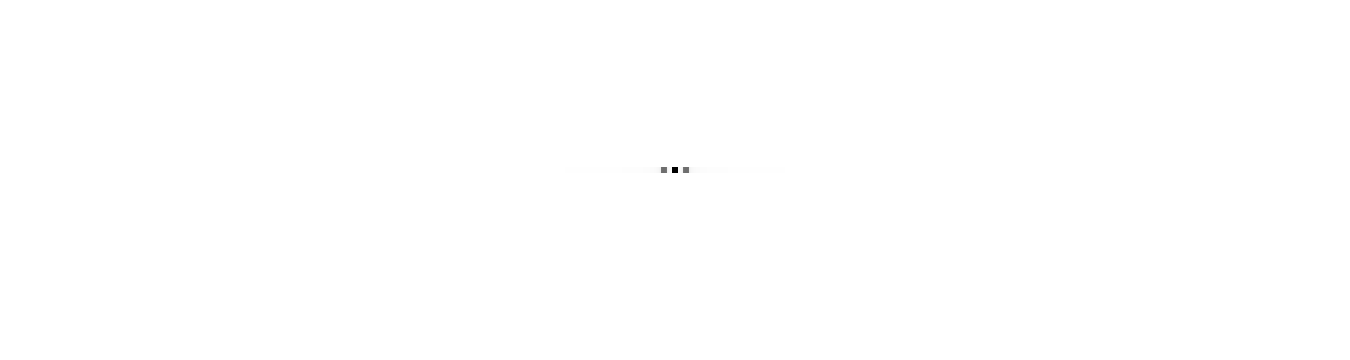

In [70]:
get_fft_spectrum(grating)

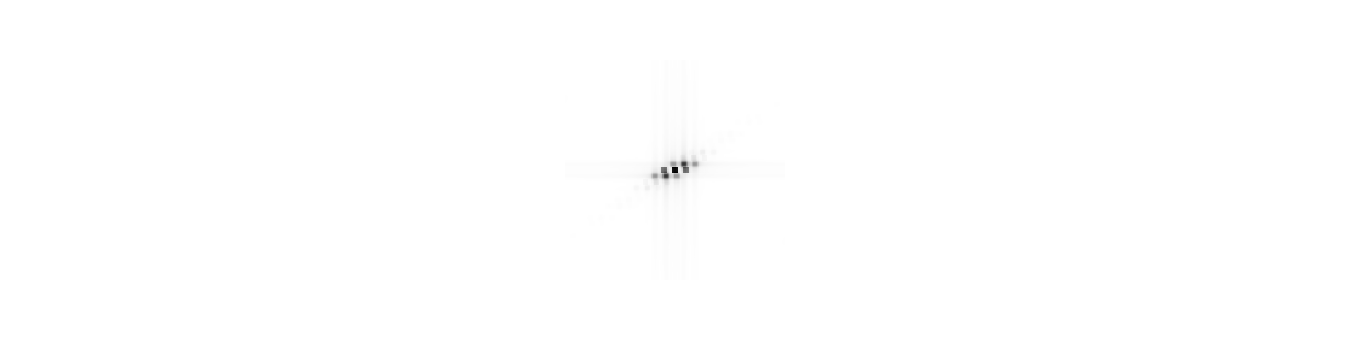

In [72]:
get_fft_spectrum(grating_overlay)

In [56]:
grating_img = Image.fromarray((grating * 255).round().astype('uint8'))
grating_rotated_img = Image.fromarray((grating_rotated * 255).round().astype('uint8'))

In [52]:
grating_overlay = Image.fromarray(((grating * grating_rotated) * 255).round().astype('uint8'))

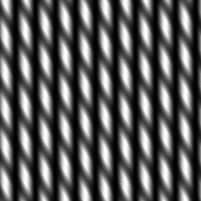

In [53]:
grating_overlay

# Convolution

In [11]:
fft_1 = np.zeros((11,11))
fft_1[5,3] = 1
fft_1[5,7] = 1

fft_2 = np.zeros((11,11))
fft_2[3,3] = 1
fft_2[7,7] = 1

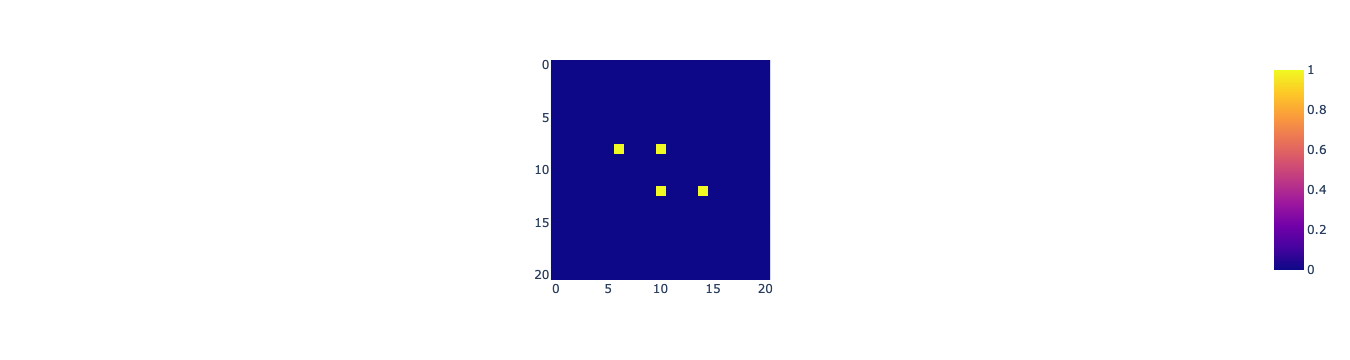

In [15]:
px.imshow(
    fftconvolve(fft_1,fft_2)
)

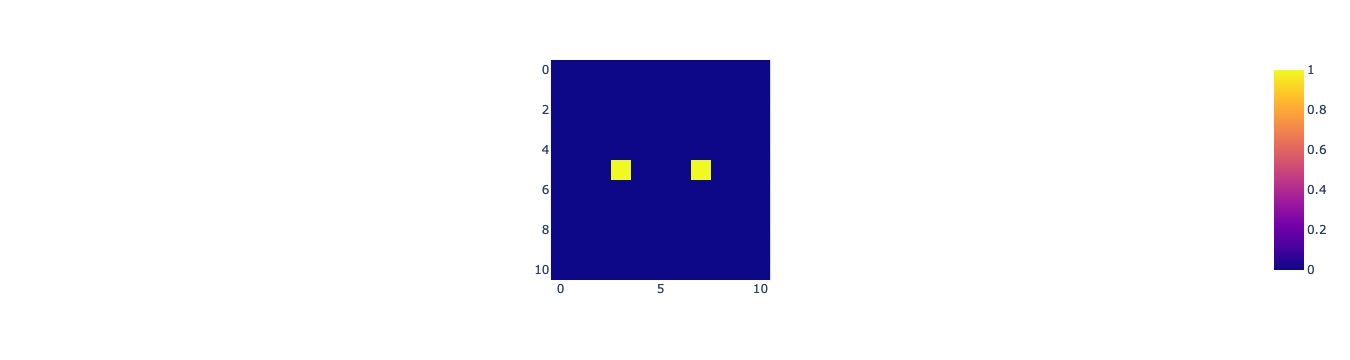

In [12]:
px.imshow(fft_1)

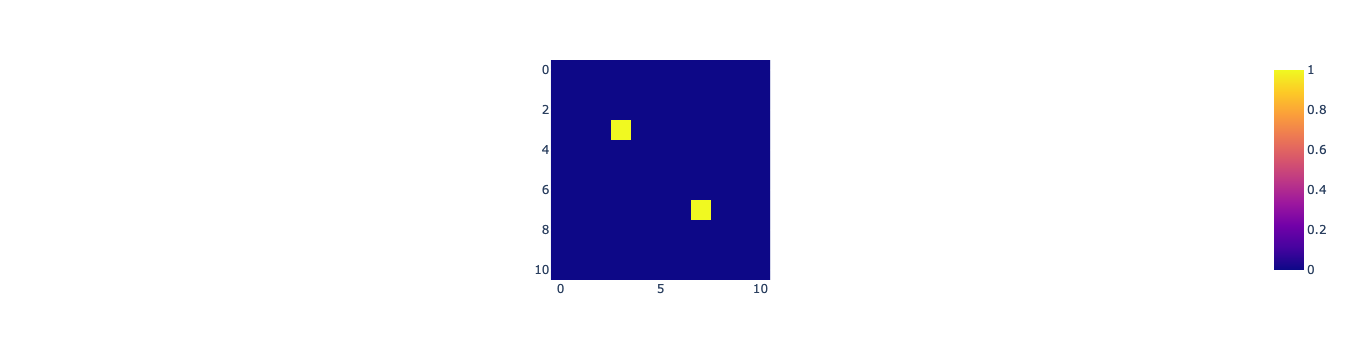

In [13]:
px.imshow(fft_2)